In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [4]:
data=pd.read_csv('/kaggle/input/housedata/data.csv')

In [3]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
df=data.copy()


# Multiple linear regression

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Exploratory data analysis

In [7]:
df.shape

(4600, 18)

In [12]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [47]:
df['street'].unique().shape

(3919,)

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [11]:
df.dtypes.value_counts()

int64      9
object     5
float64    4
Name: count, dtype: int64

In [8]:
df.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

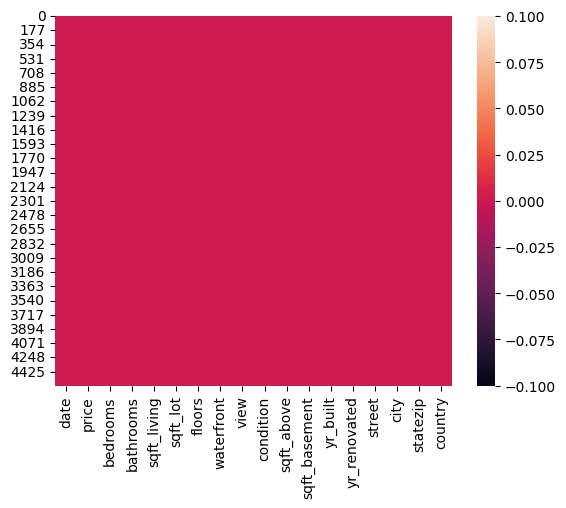

In [6]:
sns.heatmap(df.isna())

/tmp/ipykernel_33/1866581662.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

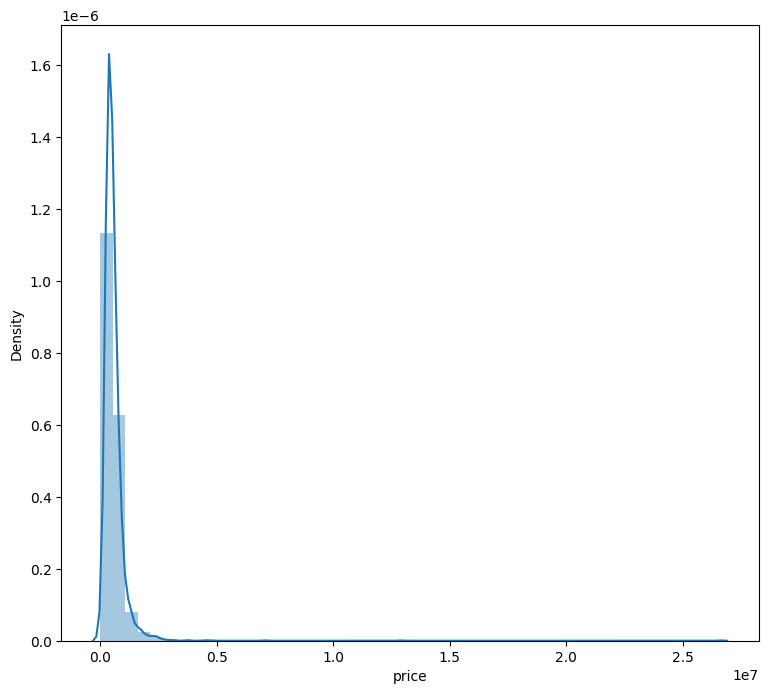

In [12]:
plt.figure(figsize=(9,8))
sns.distplot(df['price'])

In [13]:
mean = df['price'].mean()
median = df['price'].median()
std_dev = df['price'].std()

print(f"Moyenne: {mean}\nMédiane: {median}\nÉcart-type: {std_dev}")

Moyenne: 551962.9884732141
Médiane: 460943.46153850004
Écart-type: 563834.7025471414


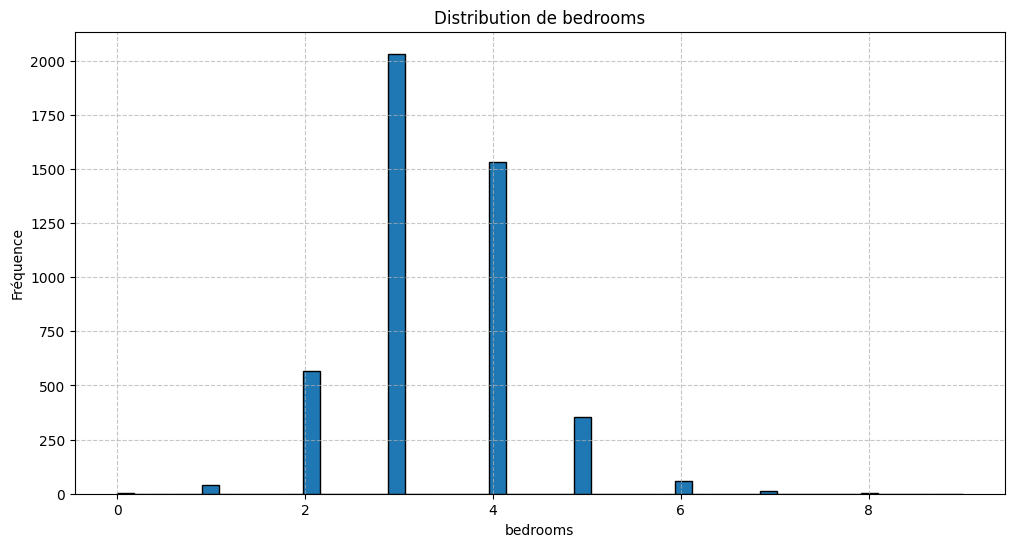

In [14]:
column_name = 'bedrooms'
plt.figure(figsize=(12, 6))
plt.hist(df[column_name], bins=50, edgecolor='black')
plt.title(f'Distribution de {column_name}')
plt.xlabel(column_name)
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

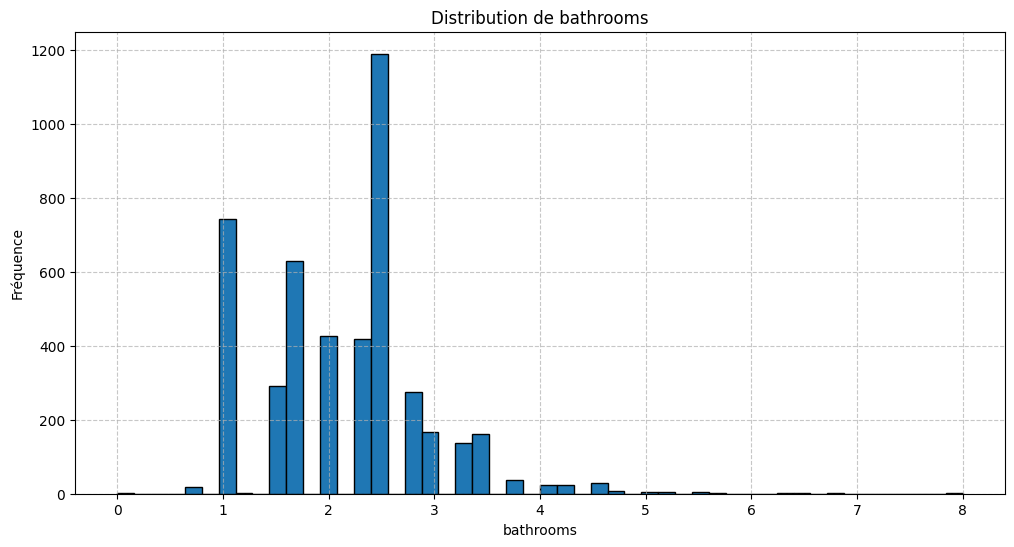

In [15]:
column_name = 'bathrooms'
plt.figure(figsize=(12, 6))
plt.hist(df[column_name], bins=50, edgecolor='black')
plt.title(f'Distribution de {column_name}')
plt.xlabel(column_name)
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

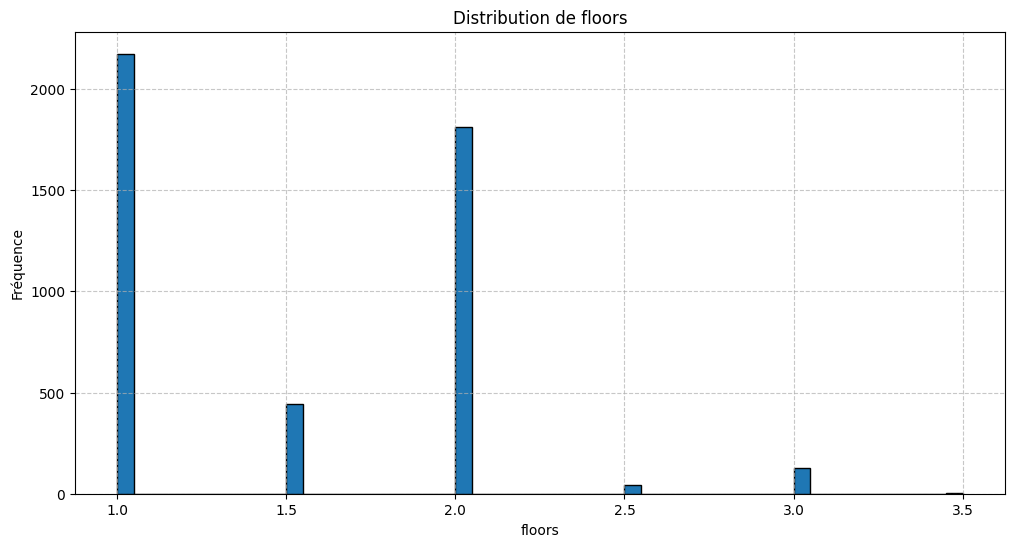

In [17]:
column_name = 'floors'
plt.figure(figsize=(12, 6))
plt.hist(df[column_name], bins=50, edgecolor='black')
plt.title(f'Distribution de {column_name}')
plt.xlabel(column_name)
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### outliers detection 

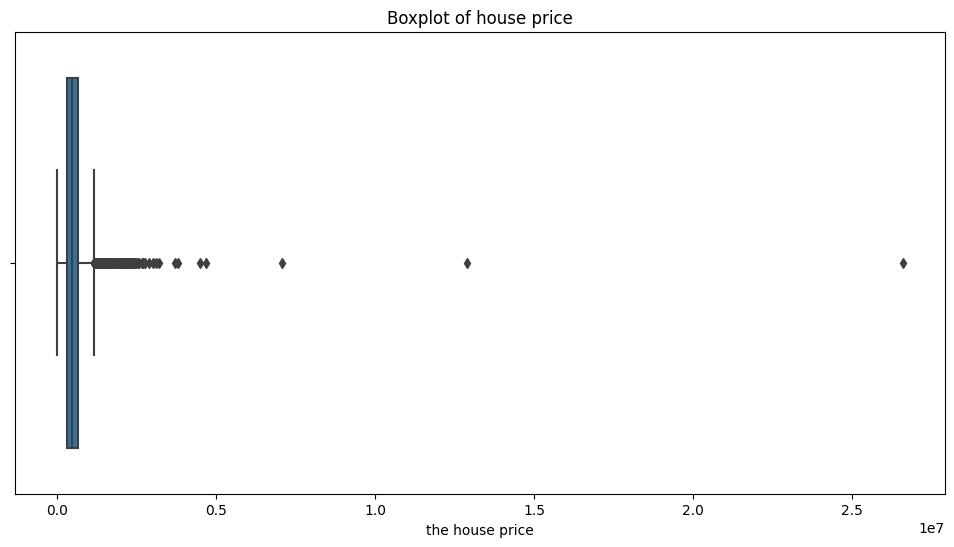

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='price')
plt.xlabel('the house price')
plt.title('Boxplot of house price')
plt.show()
    

In [7]:
def detect_outliers_iqr (data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q1+1.5*IQR
    return data[(data[column]<lower_bound)|(data[column]>upper_bound)] 
outliers=detect_outliers_iqr(df,'price')
print(outliers.shape)

(616, 18)


In [9]:
outliers.index

Index([   1,   11,   14,   49,   74,   76,   81,   92,   99,  107,
       ...
       4348, 4350, 4375, 4465, 4467, 4494, 4515, 4519, 4527, 4572],
      dtype='int64', length=616)

### Data preprocessing

In [8]:
df_cleaned=df.drop(outliers.index)

In [9]:
df=df_cleaned.drop('date',axis=1)

In [10]:
df.shape

(3984, 17)

<Axes: >

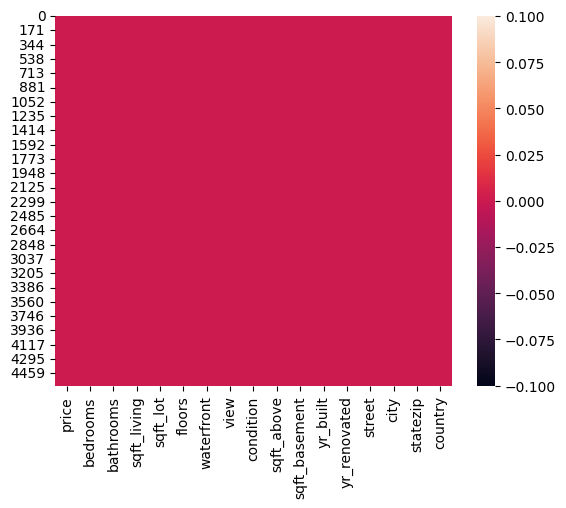

In [11]:
sns.heatmap(df.isna())

In [12]:
X=df.drop('price',axis=1)
Y=df['price']

In [13]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2)


In [14]:
columns_to_encode=['street','city','statezip','country']

In [15]:

from sklearn.preprocessing import OrdinalEncoder 
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
#encoder=OrdinalEncoder(dtype=int)
def encode_categorical_variable(X_train,columns_to_encode):
    #creating an ordinal encodage
    #encode selected columns
    encoded_data=encoder.fit_transform(X_train[columns_to_encode])
    encoded_df = pd.DataFrame(encoded_data, columns=columns_to_encode)
    print(encoded_df.shape,X_train.drop(columns_to_encode, axis=1).shape)
    result_X_train = pd.concat([X_train.drop(columns_to_encode, axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)],axis=1)
    print(result_X_train.shape)
    return result_X_train
    
new_encoded_data= encode_categorical_variable(X_train,columns_to_encode)

    

(3187, 4) (3187, 12)
(3187, 16)


<Axes: >

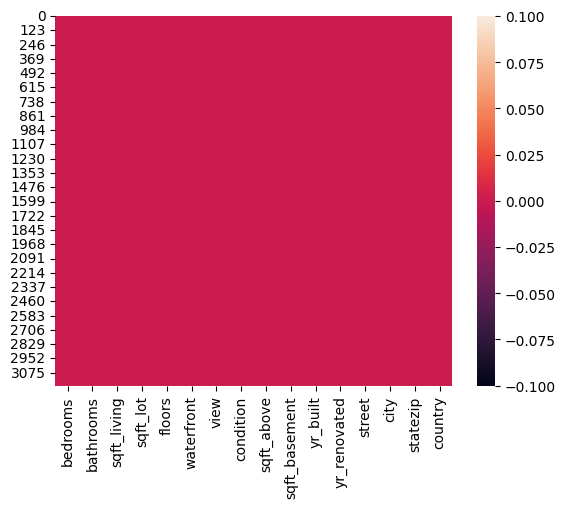

In [16]:
sns.heatmap(new_encoded_data.isna())

In [18]:
X_train.shape

(3187, 16)

In [19]:
new_encoded_data.shape

(3187, 16)

In [17]:
new_encoded_data.dtypes.value_counts()

int64      9
float64    7
Name: count, dtype: int64

In [20]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(new_encoded_data)


In [21]:
X_train_scaled.shape

(3187, 16)

In [22]:
X_train_scaled

array([[ 0.77728938,  0.67823479,  0.31049807, ...,  0.16509688,
        -0.54483859,  0.        ],
       [-0.36692367,  2.13577645, -0.0423569 , ...,  0.78111063,
         1.15218115,  0.        ],
       [ 0.77728938, -0.77930687,  0.26978403, ..., -0.62692081,
        -0.89422501,  0.        ],
       ...,
       [ 0.77728938, -0.41492145,  1.45049105, ...,  0.51710474,
        -0.24536452,  0.        ],
       [-0.36692367, -1.5080777 , -1.18234989, ...,  0.69310867,
         1.60139226,  0.        ],
       [ 0.77728938,  2.13577645,  0.94835128, ...,  0.69310867,
         1.60139226,  0.        ]])

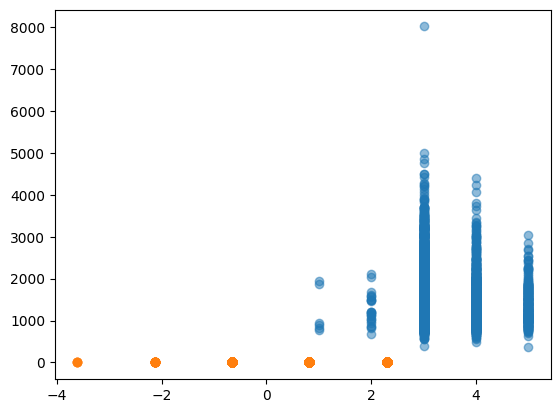

In [24]:
plt.scatter(new_encoded_data.iloc[:,7], new_encoded_data.iloc[:,8], alpha=0.5, label='origine')
plt.scatter(X_train_scaled[:,7], X_train_scaled[:,8], alpha=0.5, label='normalisé')

## Entrainement du modèle

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

### Evaluation du modèle

In [26]:
encoded_data_test=encoder.transform(X_test[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data_test, columns=columns_to_encode)
result_X_test=pd.concat([X_test.drop(columns_to_encode,axis=1).reset_index(drop=True),encoded_df.reset_index(drop=True)],axis=1)

X_test_scaled=scaler.transform(result_X_test)


In [27]:
encoded_data_test.shape

(797, 4)

In [28]:
encoded_df.shape

(797, 4)

In [29]:
X_test_scaled.shape

(797, 16)

In [30]:
Y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 21417356599.79
RMSE: 146346.70
R² Score: 0.31


### Analyse des résultat 

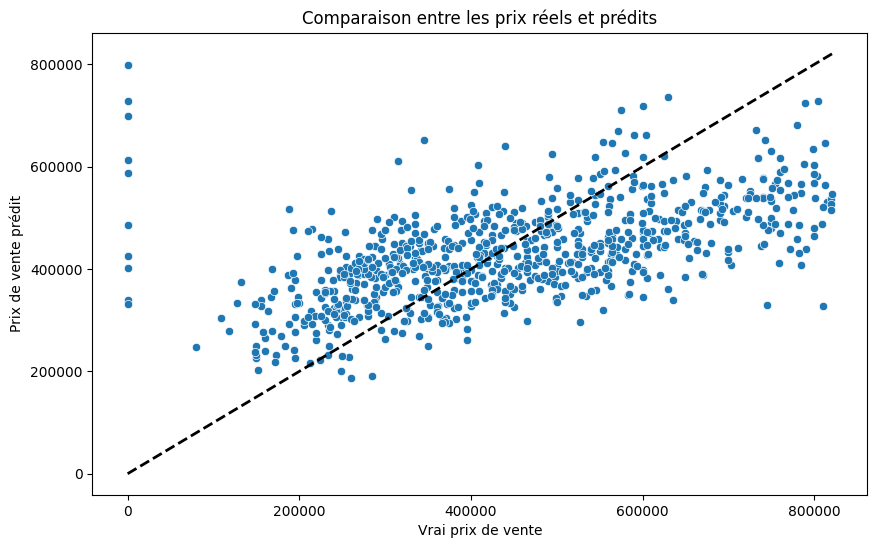

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Vrai prix de vente')
plt.ylabel('Prix de vente prédit')
plt.title('Comparaison entre les prix réels et prédits')
plt.show()